In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('TensorFlow_FILES\DATA\cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

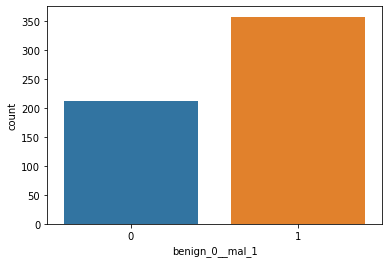

In [11]:
sns.countplot(x='benign_0__mal_1',data=df)

In [12]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<AxesSubplot:>

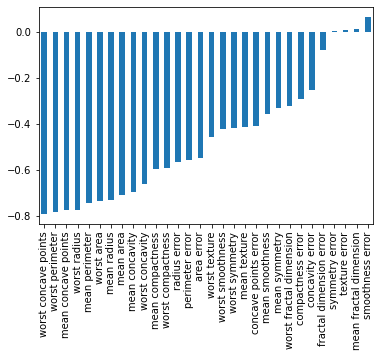

In [15]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

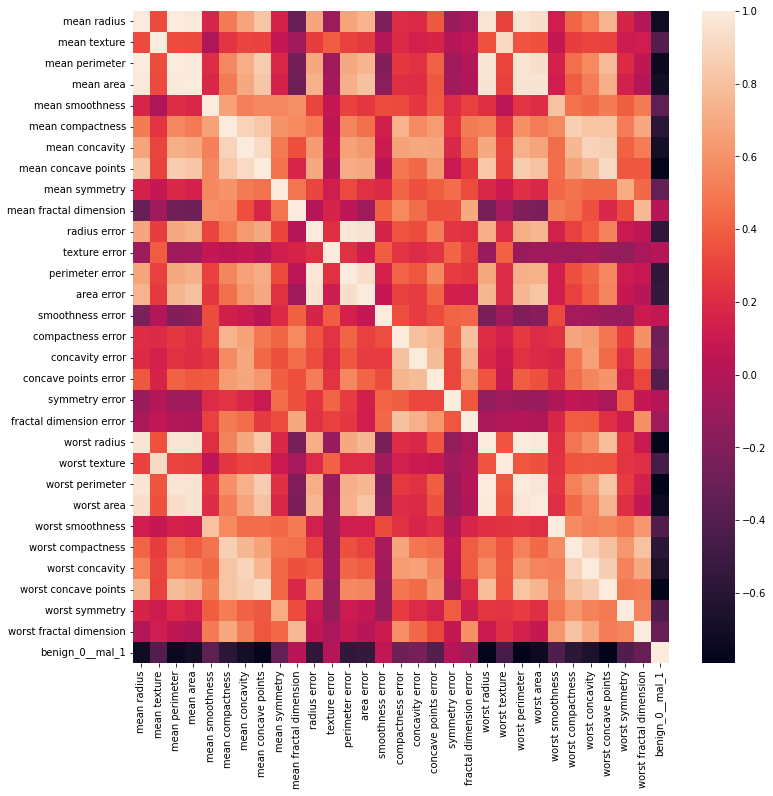

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [18]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.fit_transform(X_test)

In [29]:
from tensorflow.keras.models import Sequential

In [26]:
from tensorflow.keras.layers import Dense, Dropout

In [27]:
X_train.shape

(426, 30)

In [30]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

#Binary Classification
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [31]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6451 - val_loss: 0.6106
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5966 - val_loss: 0.5673
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5548 - val_loss: 0.5248
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5106 - val_loss: 0.4794
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4616 - val_loss: 0.4310
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4183 - val_loss: 0.3921
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3814 - val_loss: 0.3587
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3480 - val_loss: 0.3346
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3194 - val_loss: 0.3021
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2926 - val_loss: 0.2981
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0553 - val_loss: 0.2760
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0537 - val_loss: 0.3053
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0539 - val_loss: 0.3214
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0538 - val_loss: 0.2731
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0537 - val_loss: 0.3004
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0540 - val_loss: 0.2918
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0550 - val_loss: 0.3234
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0541 - val_loss: 0.2929
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0527 - val_loss: 0.2864
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0541 - val_loss: 0.3143
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0445 - val_loss: 0.4883
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0478 - val_loss: 0.4689
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.3914
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0439 - val_loss: 0.5134
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0454 - val_loss: 0.4134
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0449 - val_loss: 0.4520
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0450 - val_loss: 0.5044
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0460 - val_loss: 0.4636
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0440 - val_loss: 0.4506
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0444 - val_loss: 0.4905
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0401 - val_loss: 0.6337
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.5422
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0410 - val_loss: 0.6928
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0424 - val_loss: 0.6427
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.6092
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.6133
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0372 - val_loss: 0.6177
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.6098
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0421 - val_loss: 0.6642
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0373 - val_loss: 0.5953
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0323 - val_loss: 0.7326
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0321 - val_loss: 0.7929
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0336 - val_loss: 0.7965
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0311 - val_loss: 0.6851
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0358 - val_loss: 0.8223
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 0.7428
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0319 - val_loss: 0.8105
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0326 - val_loss: 0.7943
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0314 - val_loss: 0.7365
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0313 - val_loss: 0.7405
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.8215
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0274 - val_loss: 0.8741
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.9118
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0259 - val_loss: 0.8353
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.9530
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0271 - val_loss: 0.8007
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.9296
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.9255
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0264 - val_loss: 0.8538
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0256 - val_loss: 0.9339
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.9926
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.9765
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 1.0044
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.9667
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 1.0256
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.9874
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 1.0459
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0196 - val_loss: 0.9745
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 1.0547
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0215 - val_loss: 0.9997
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 1.1012
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 1.0008
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0145 - val_loss: 1.0970
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 1.0425
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 1.1114
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 1.0649
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 1.1459
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 1.0060
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0139 - val_loss: 1.1154
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 1.0471
Epoc

In [32]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

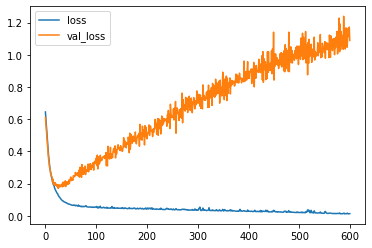

In [33]:
losses.plot()

In [41]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

#Binary Classification
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [44]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [45]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 22ms/step - loss: 0.6771 - val_loss: 0.6468
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6320 - val_loss: 0.6035
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5982 - val_loss: 0.5685
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5606 - val_loss: 0.5207
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5201 - val_loss: 0.4676
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4682 - val_loss: 0.4190
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4199 - val_loss: 0.3712
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3766 - val_loss: 0.3291
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3373 - val_loss: 0.2915
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3029 - val_loss: 0.2616
Epoch 11

<AxesSubplot:>

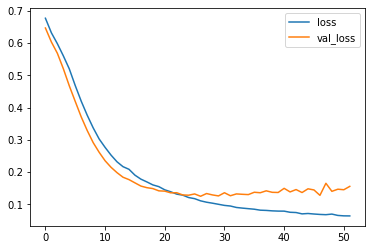

In [46]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [47]:
from tensorflow.keras.layers import Dropout

In [68]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))

#Binary Classification
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [69]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7216 - val_loss: 0.6769
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6908 - val_loss: 0.6646
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6766 - val_loss: 0.6486
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6484 - val_loss: 0.6335
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6359 - val_loss: 0.6173
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6324 - val_loss: 0.6002
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6295 - val_loss: 0.5800
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6054 - val_loss: 0.5553
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5919 - val_loss: 0.5268
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5543 - val_loss: 0.4974
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1348 - val_loss: 0.2086
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1067 - val_loss: 0.2508
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1178 - val_loss: 0.1893
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1396 - val_loss: 0.2196
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1185 - val_loss: 0.1800
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1068 - val_loss: 0.2170
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1188 - val_loss: 0.1731
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1089 - val_loss: 0.2274
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 0.2165
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1177 - val_loss: 0.1974
Epoch 93/600


In [70]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

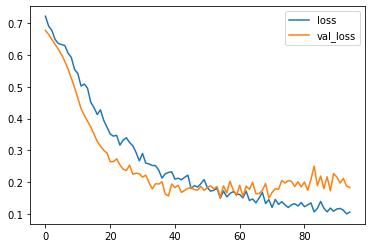

In [71]:
model_loss.plot()

In [60]:
# model.predict(X_test)

In [77]:
predictions = model.predict(X_test)
predictions = np.round(predictions).astype(int)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91        55
           1       0.99      0.89      0.93        88

    accuracy                           0.92       143
   macro avg       0.92      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143



In [79]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [10 78]]
